<a href="https://colab.research.google.com/github/tuhinaww/Diabeters_Onset_Prediction/blob/main/Diabeters_Onset_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Onset Prediction

## Introduction

In this project, we aim to predict the onset of diabetes using machine learning. We'll start with a Logistic Regression model as our primary model and compare it with Decision Trees and Random Forest. Each step will involve detailed explanations, including data exploration, feature engineering, and model evaluation. Through a structured comparison, we aim to show why Logistic Regression performs best in this context.

## Import Libraries

To start, we need essential libraries for data manipulation, visualization, and model building. Below are descriptions of key libraries:
- `numpy` and `pandas` for data handling.
- `matplotlib` and `seaborn` for data visualization.
- `scikit-learn` for machine learning model building and evaluation.

We also set up a seaborn theme for consistent and clear visuals.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report
)

sns.set(style="whitegrid")

##  Load and Explore Data

Here, we load the Pima Indians Diabetes dataset. We’ll explore the dataset structure to understand its attributes and verify if any cleaning is required. This step includes:
1. Checking for missing values.
2. Viewing the initial rows to understand the data format.
3. Reviewing the basic statistical summary of the dataset.

In [ ]:
data = pd.read_csv("diabetes.csv")
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Data Cleaning and Exploration

In this section, we handle any missing values and get an overview of the data distribution through histograms and correlation analysis. This exploration helps in identifying which features might be relevant for the model.

- **Distribution Plots**: Show the distribution of each feature to understand data skewness and spread.
- **Correlation Matrix**: Visualize correlations to detect feature relationships.

In [ ]:
missing_values = data.isnull().sum() # Check for Missing Values

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


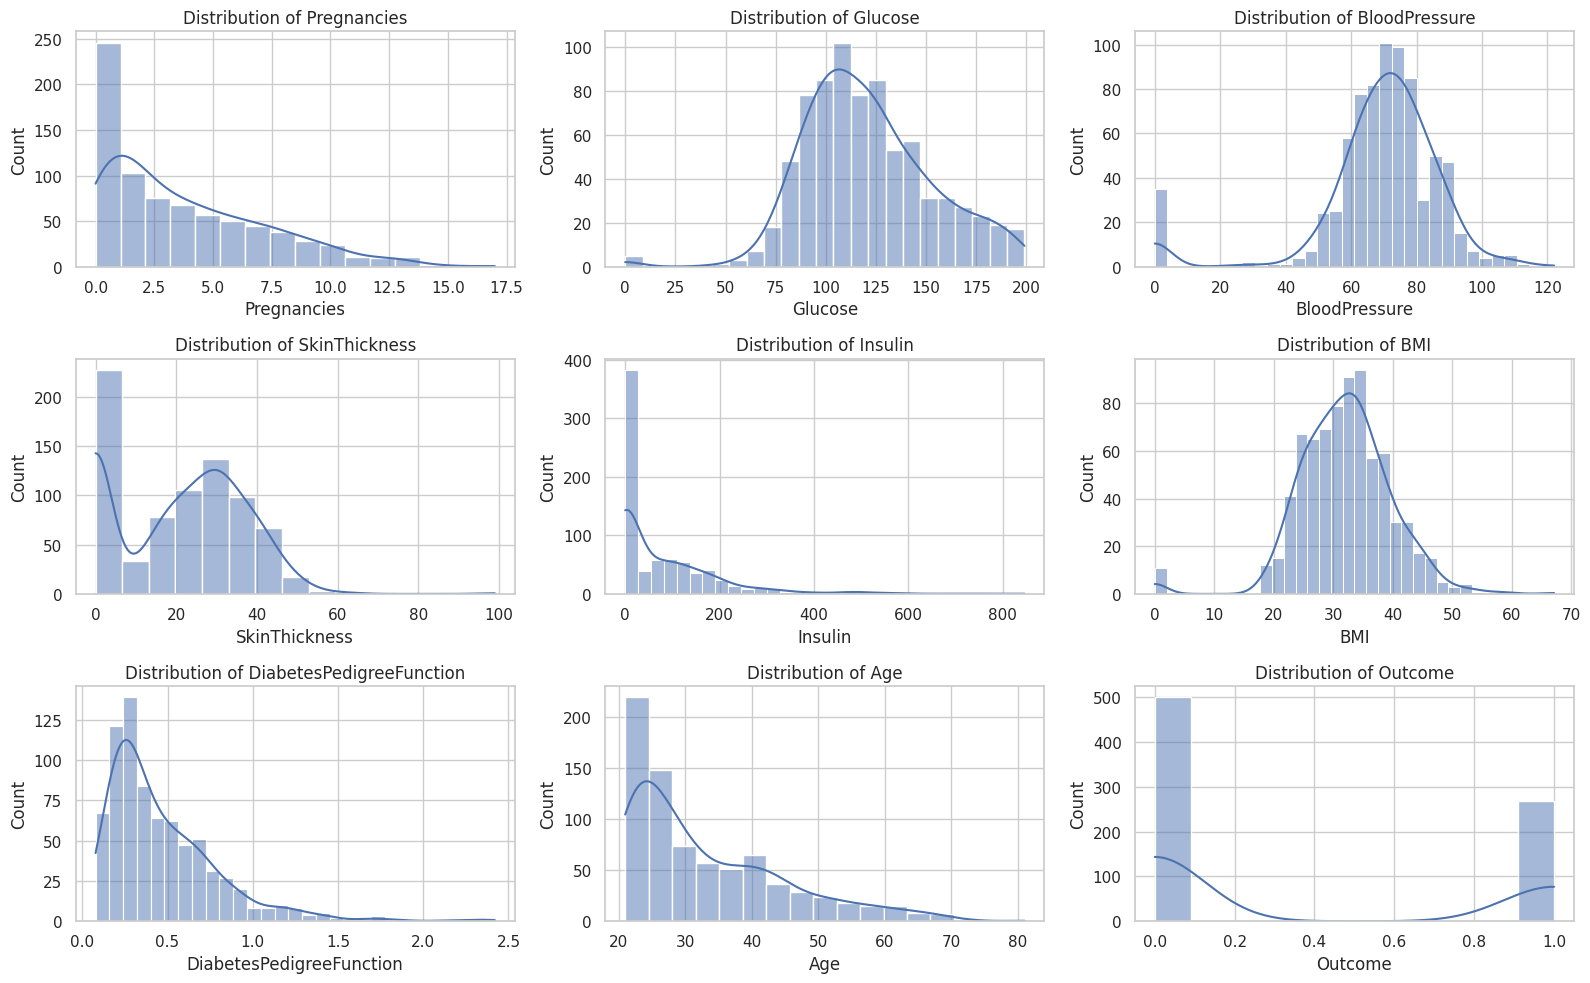

In [ ]:
# Plot Distributions
plt.figure(figsize=(16, 10))
for i, column in enumerate(data.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

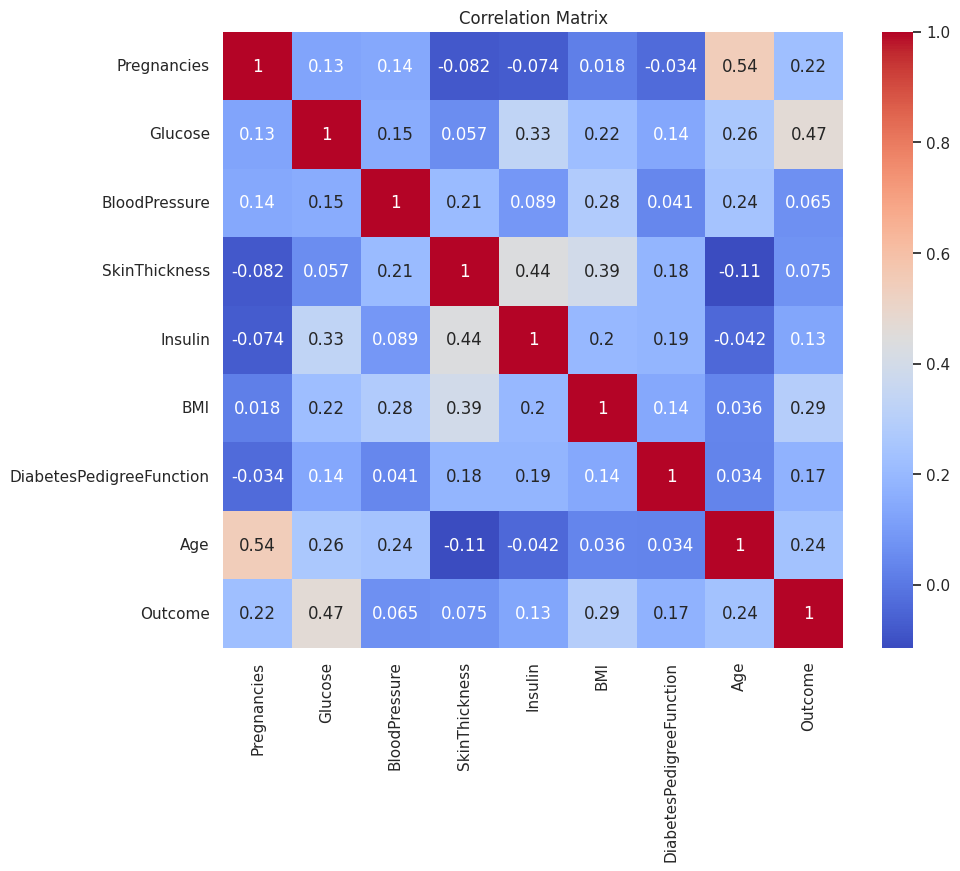

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
X = data.drop("Outcome", axis=1) # Define Features (X) and Target (y)
y = data["Outcome"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Split Data

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Feature Scaling
X_test_scaled = scaler.transform(X_test)

## Model Building and Evaluation

Now, we build three different models: Logistic Regression, Decision Tree, and Random Forest. Each model will be trained on the scaled training data and then evaluated on the test set. Our focus is to:
1. Train the models on the training data.
2. Generate predictions on the test data.
3. Evaluate each model using metrics like accuracy, precision, recall, F1-score, and ROC-AUC score.


In [ ]:
log_reg = LogisticRegression()
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [ ]:
log_reg.fit(X_train_scaled, y_train)
dtree.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [ ]:
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_dtree = dtree.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)

In [ ]:
# Evaluate Models
models = {
    "Logistic Regression": y_pred_log_reg,
    "Decision Tree": y_pred_dtree,
    "Random Forest": y_pred_rf
}

In [ ]:
for model_name, y_pred in models.items():
    print(f"\nModel: {model_name}")
    print(classification_report(y_test, y_pred))


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231


Model: Decision Tree
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       151
           1       0.56      0.68      0.61        80

    accuracy                           0.71       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.71      0.71       231


Model: Random Forest
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
we

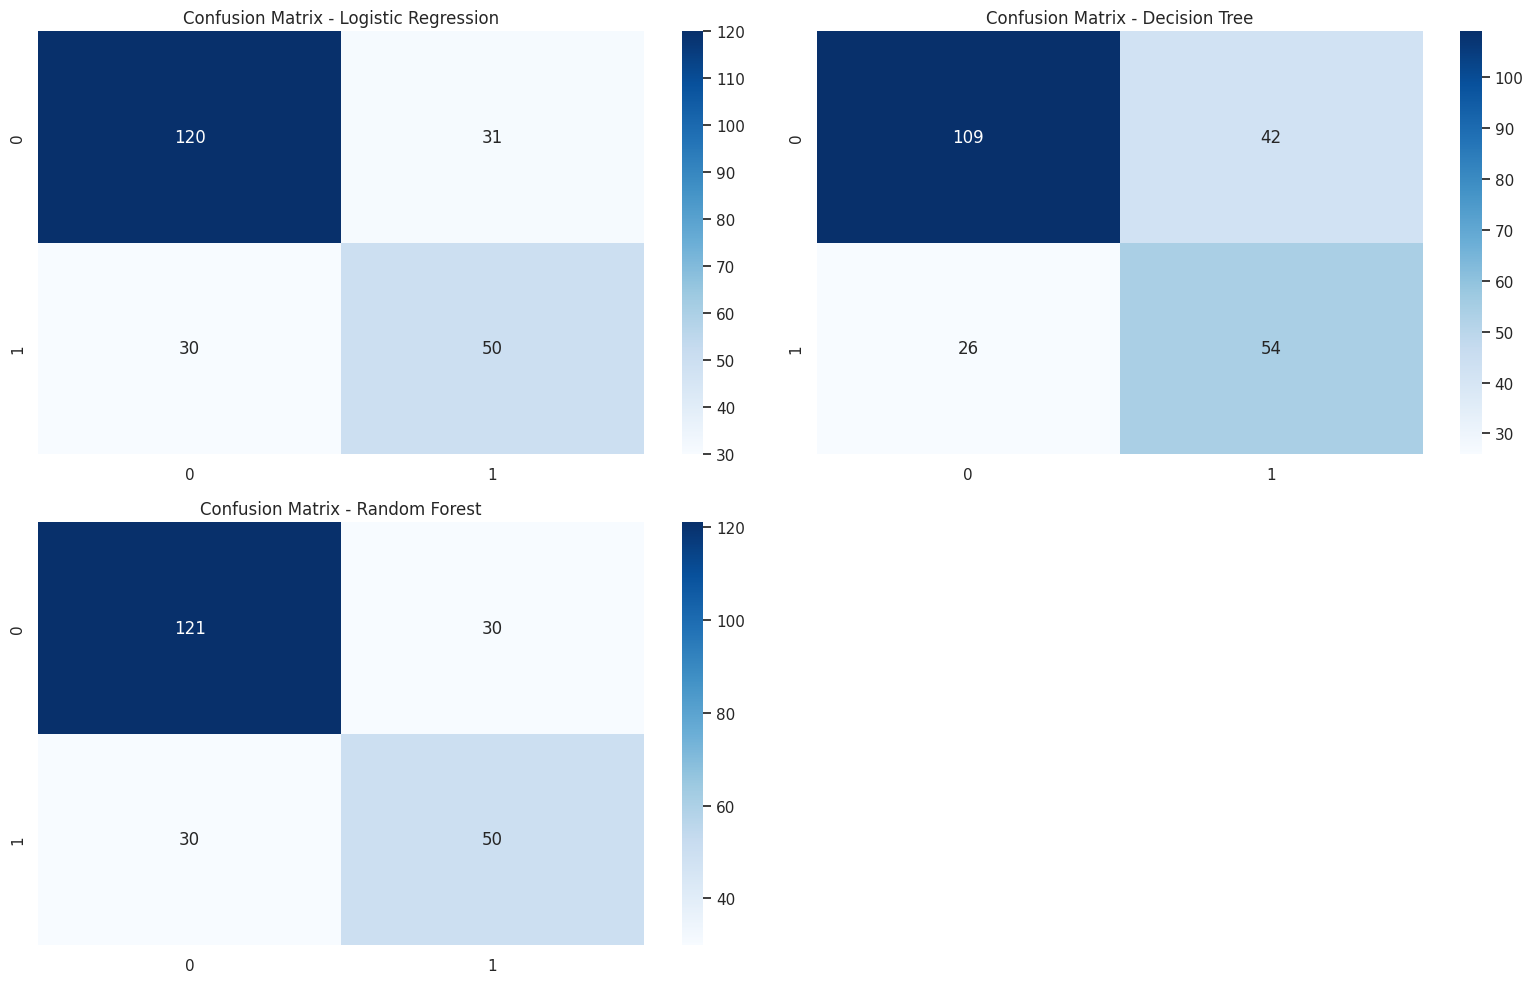

In [ ]:
plt.figure(figsize=(16, 10))
for i, (model_name, y_pred) in enumerate(models.items(), 1):
    plt.subplot(2, 2, i)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
plt.tight_layout()
plt.show()

## ROC-AUC and Model Comparison

To compare model performance, we calculate the ROC-AUC score for each model and visualize it using ROC curves. The ROC-AUC score gives a single measure of performance for binary classifiers. Here’s what we do:
1. Plot ROC curves to visually compare models.
2. Display a bar plot to compare ROC-AUC scores across all models.


In [ ]:
# Calculate ROC-AUC Scores
roc_auc_scores = {}
for model_name, y_pred in models.items():
    roc_auc_scores[model_name] = roc_auc_score(y_test, y_pred)

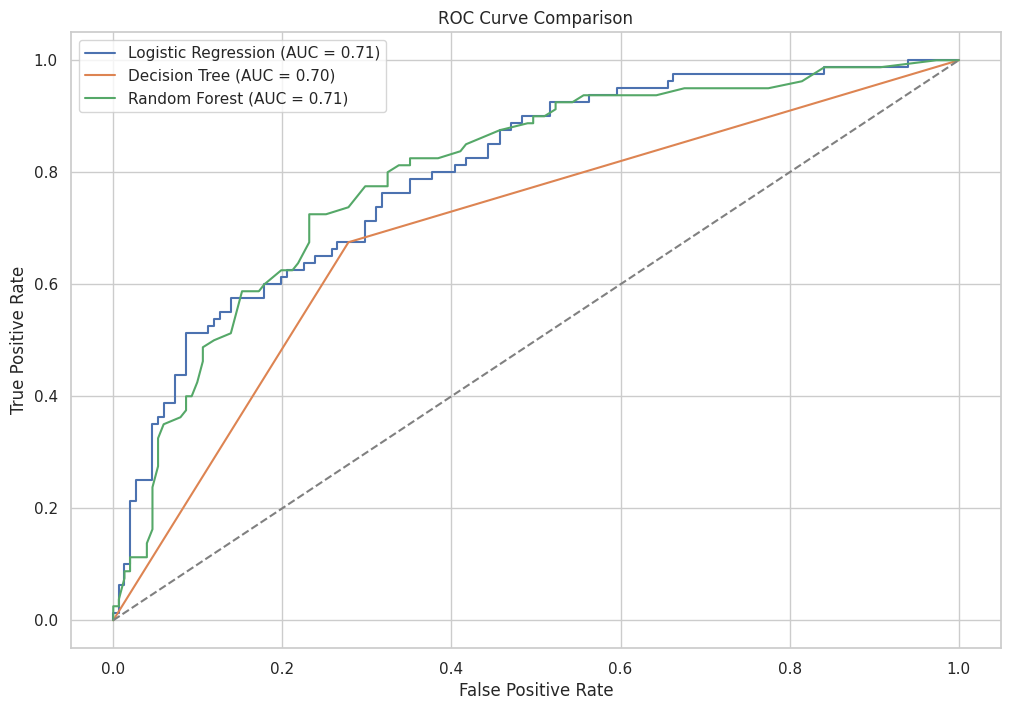

In [ ]:
plt.figure(figsize=(12, 8))
for model_name, model in [("Logistic Regression", log_reg), ("Decision Tree", dtree), ("Random Forest", rf)]:
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc_scores[model_name]:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

<ipython-input-40-6b1af94f6d34>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(roc_auc_scores.keys()), y=list(roc_auc_scores.values()), palette="viridis")


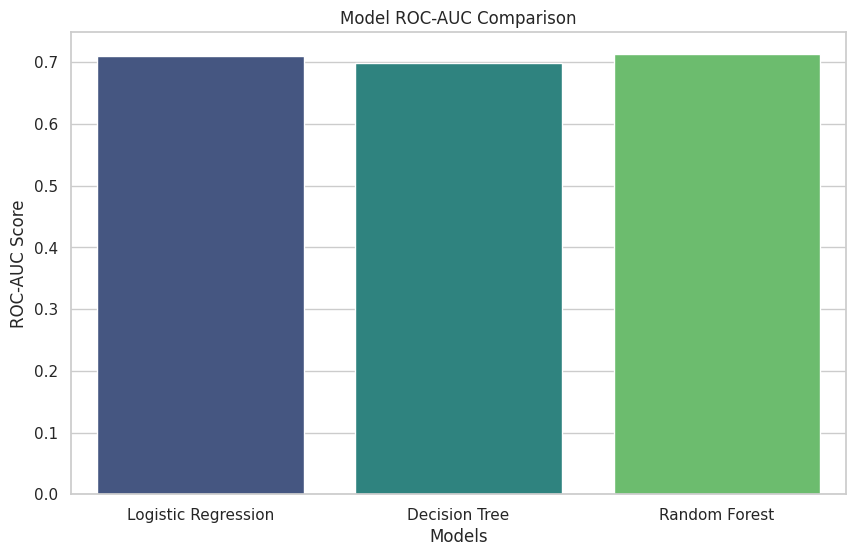

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(roc_auc_scores.keys()), y=list(roc_auc_scores.values()), palette="viridis")
plt.xlabel("Models")
plt.ylabel("ROC-AUC Score")
plt.title("Model ROC-AUC Comparison")
plt.show()

## Prediction Cell

In [ ]:
print("Enter the following values for prediction:")

pregnancies = float(input("Pregnancies: "))
glucose = float(input("Glucose Level: "))
blood_pressure = float(input("Blood Pressure: "))
skin_thickness = float(input("Skin Thickness: "))
insulin = float(input("Insulin Level: "))
bmi = float(input("BMI: "))
diabetes_pedigree_function = float(input("Diabetes Pedigree Function: "))
age = float(input("Age: "))

Enter the following values for prediction:
Pregnancies: 1
Glucose Level: 140
Blood Pressure: 60
Skin Thickness: 20
Insulin Level: 90
BMI: 25
Diabetes Pedigree Function: 0.6
Age: 29


In [ ]:
input_data = pd.DataFrame({
    'Pregnancies': [pregnancies],
    'Glucose': [glucose],
    'BloodPressure': [blood_pressure],
    'SkinThickness': [skin_thickness],
    'Insulin': [insulin],
    'BMI': [bmi],
    'DiabetesPedigreeFunction': [diabetes_pedigree_function],
    'Age': [age]
})

In [ ]:
input_data_scaled = scaler.transform(input_data)

prediction = log_reg.predict(input_data_scaled)
prediction_proba = log_reg.predict_proba(input_data_scaled)[0][1]  # Probability of having diabetes

if prediction[0] == 1:
    print(f"\nPrediction: The model predicts the person has diabetes with a probability of {prediction_proba:.2f}.")
else:
    print(f"\nPrediction: The model predicts the person does not have diabetes with a probability of {1 - prediction_proba:.2f}.")



Prediction: The model predicts the person does not have diabetes with a probability of 0.75.
